<a href="https://colab.research.google.com/github/benk-007/Feature_extraction_and_classification_using_deep_learning/blob/main/Atelier_CNN_TP_Commente%CC%81_Rapport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atelier 2 : Feature Extraction et Classification avec CNN
**Rapport – Version commentée**

Ce notebook présente la réalisation complète du TP sur les réseaux de neurones convolutifs (CNN).
Chaque section contient des **explications théoriques**, suivies de leur **implémentation pratique**.


## 1. Manipulation des tenseurs
Un **tenseur** est une généralisation des vecteurs et matrices à des dimensions supérieures.
Dans cette partie, nous définissons :
- un tenseur A d’ordre 4
- une matrice B d’ordre 2


In [7]:
import numpy as np

A = np.random.randint(0, 10, (2,3,4,5))
B = np.random.randint(0, 10, (4,4))

print("Shape de A :", A.shape)
print("Shape de B :", B.shape)

Shape de A : (2, 3, 4, 5)
Shape de B : (4, 4)


## 2. Image couleur aléatoire
Une image couleur est représentée par un tenseur de forme (hauteur, largeur, 3),
où les 3 canaux correspondent à **Rouge, Vert, Bleu (RGB)**.


(np.float64(-0.5), np.float64(3.5), np.float64(3.5), np.float64(-0.5))

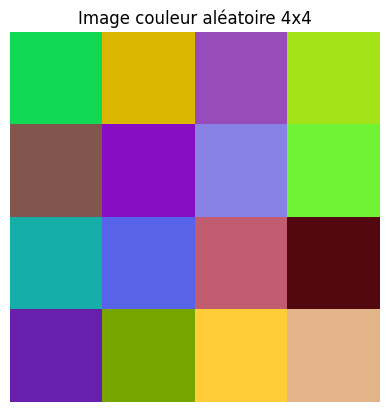

In [2]:
import matplotlib.pyplot as plt

img = np.random.randint(0,256,(4,4,3),dtype=np.uint8)
plt.imshow(img)
plt.title("Image couleur aléatoire 4x4")
plt.axis('off')

## 3. Convolution 1D
La convolution 1D permet de détecter des **changements** dans un signal.
Ici, le noyau [-1, 1] agit comme un détecteur de transitions.


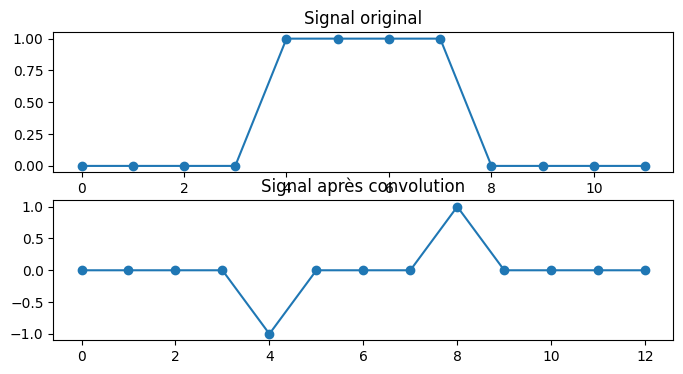

In [3]:
a = np.array([0,0,0,0,1,1,1,1,0,0,0,0])
b = np.array([-1,1])
c = np.convolve(a,b)

plt.figure(figsize=(8,4))
plt.subplot(211)
plt.plot(a,'o-')
plt.title("Signal original")

plt.subplot(212)
plt.plot(c,'o-')
plt.title("Signal après convolution")
plt.show()

## 4. Filtrage d’image par convolution
La convolution 2D est utilisée pour détecter des **contours** dans une image.
Le noyau utilisé met en évidence les **lignes horizontales**.


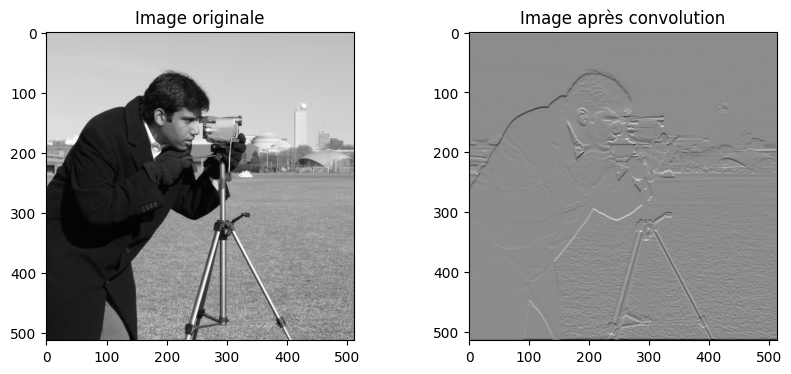

In [4]:
from skimage import data
from scipy.signal import convolve2d

img = data.camera() # Replaced misc.ascent()
kernel = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])

res = convolve2d(img, kernel)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Image originale")

plt.subplot(122)
plt.imshow(res, cmap='gray')
plt.title("Image après convolution")
plt.show()

## 5. Réseau de neurones convolutif simple
Un CNN apprend automatiquement les noyaux de convolution.
Nous appliquons ici une seule couche Conv2D sur une image.


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

img_tensor = img.reshape(1,512,512,1).astype('float32')

model = tf.keras.Sequential()
model.add(Conv2D(1,(3,3),padding='same',input_shape=(512,512,1)))
model.compile(optimizer='adam', loss='mse')

output = model.predict(img_tensor)
print("Shape de sortie :", output.shape)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Shape de sortie : (1, 512, 512, 1)


## 6. Classification avec MNIST
Le dataset MNIST contient des images 28x28 de chiffres manuscrits.
Nous construisons un CNN pour classer ces chiffres en 10 classes.


In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical

(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.fit(X_train,y_train,epochs=1,batch_size=128,validation_split=0.2)
model.evaluate(X_test,y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 116ms/step - accuracy: 0.8463 - loss: 0.5454 - val_accuracy: 0.9736 - val_loss: 0.0947
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9691 - loss: 0.0937


[0.08204122632741928, 0.9742000102996826]

## Conclusion
Ce TP nous a permis de :
- comprendre le rôle de la convolution
- manipuler des images comme des tenseurs
- construire et entraîner un CNN
- appliquer la classification sur MNIST

Les CNN sont largement utilisés en vision par ordinateur grâce à leur capacité
à apprendre automatiquement des caractéristiques pertinentes.
